In [78]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Paramters
num_epochs = 400
input_dim = 1
output_dim = 1
hidden_dims = 6*([32, 64, 128, 256, 512, 1014, 2028])

# Model Training & Testing Points Settings
model_training_points = 200
model_testing_points = 30

# New Data Point Parameters
new_data_points = 60

#* Forming the Training and Testing Points
def y(x): 
    return 1.8*torch.sin(x * (8 * math.pi))*2*x

# Training data
X = torch.linspace(0, 1, model_training_points)
x_train = np.random.permutation(X)
x_train = torch.from_numpy(x_train)
x_train = x_train[:, None].to(device)

y_train = y(x_train)
y_train = y_train.view(-1, 1).to(device)

# Testing data 
X = torch.linspace(0, 1, model_testing_points)
x_test = np.random.permutation(X)
x_test = torch.from_numpy(x_test) 
x_test = x_test[:, None].to(device)

y_test = y(x_test)
y_test = y_test.view(-1, 1).to(device)

In [80]:
#* Setting the NN model
class NeuralNetwork(torch.nn.Module):
  def __init__(self, input_dim, hidden_dims, output_dim):
    super().__init__()
    self.fc1 = torch.nn.Linear(input_dim, hidden_dims[0])
    self.fc2 = torch.nn.Linear(hidden_dims[0], hidden_dims[1])
    self.fc3 = torch.nn.Linear(hidden_dims[1], hidden_dims[2])
    self.fc4 = torch.nn.Linear(hidden_dims[2], hidden_dims[3])
    self.fc5 = torch.nn.Linear(hidden_dims[3], hidden_dims[4])
    self.fc6 = torch.nn.Linear(hidden_dims[4], hidden_dims[5])
    self.fc7 = torch.nn.Linear(hidden_dims[5], hidden_dims[6])
    self.fc8 = torch.nn.Linear(hidden_dims[6], output_dim)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = torch.relu(self.fc5(x))
    x = torch.relu(self.fc6(x))
    x = torch.relu(self.fc7(x))
    x = self.fc8(x)
    return x

model = NeuralNetwork(input_dim, hidden_dims, output_dim).to(device)

# Defining the loss function and optimizer
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters())

# Keep track of the losses to plot it in the future
losses = []

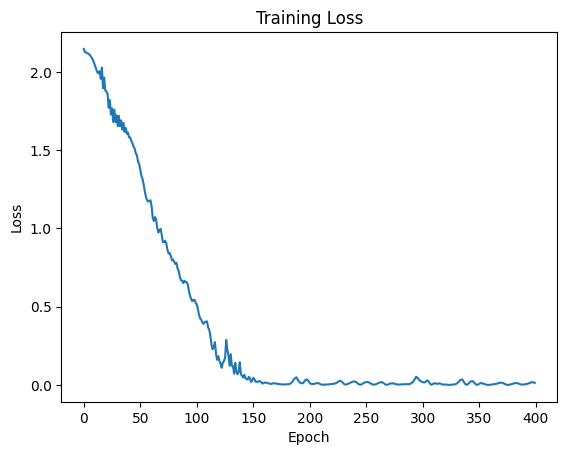

tensor(0.0128, device='cuda:0', grad_fn=<MseLossBackward0>)


In [81]:
# Train the model
for epoch in range(num_epochs):

  # Forward pass
  y_pred = model(x_train).to(device)

  # Computing the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

# Plotting the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluating the network on the validation set 
val_outputs = model(x_test)
val_loss = criterion(val_outputs, y_test)
print(val_loss)

# Using the network to make predictions-------------------- Model Training is Complete--------------------------------------
predictions = model(x_test)

In [82]:
# ----------------------------------------------------------Define the NEW input data---------------------------------------
X = torch.linspace(0, 1, new_data_points)
x_new = np.random.permutation(X)
x_new = torch.from_numpy(x_new)
x_new = x_new[:, None].to(device)

y_pred_new = model(x_new).to(device)

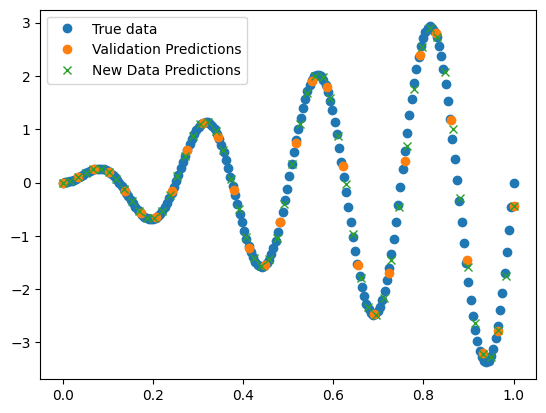

In [83]:
# Plotting the predictions against the true values after converting from CUDA to CPU's memory
plt.plot(x_train.cpu().numpy(), y_train.cpu().numpy(),'o', label='True data')
plt.plot(x_test.cpu().numpy(), predictions.cpu().detach().numpy(), 'o', label = 'Validation Predictions')
plt.plot(x_new.cpu().numpy(), y_pred_new.cpu().detach().numpy(), 'x', label = 'New Data Predictions')

plt.legend()
plt.show()